In [47]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import cartopy.crs as ccrs
import wocemaps as wm

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
# this only needs to be created once per Jupyter session
gcs = gcsfs.GCSFileSystem(token='anon')

**Monthly Sea Surface Salinity (sos) Datasets**

In [22]:
sos126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

sos126_zarr = sos126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
sos126_mapper = gcs.get_mapper(sos126_zarr)
# open the dataset using xarray and zarr
sos126 = xr.open_zarr(sos126_mapper, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [23]:
sos585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

sos585_zarr = sos585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
sos585_mapper = gcs.get_mapper(sos585_zarr)
# open the dataset using xarray and zarr
sos585 = xr.open_zarr(sos585_mapper, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly Precipitation (pr) Datasets**

In [24]:
pr126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

pr126_zarr = pr126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
pr126_mapper = gcs.get_mapper(pr126_zarr)
# open the dataset using xarray and zarr
pr126 = xr.open_zarr(pr126_mapper, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [115]:
pr585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

pr585_zarr = pr585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
pr585_mapper = gcs.get_mapper(pr585_zarr)
# open the dataset using xarray and zarr
pr585 = xr.open_zarr(pr585_mapper, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly Water Vapor Content (prw) Datasets**

In [26]:
prw126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prw126_zarr = prw126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prw126_mapper = gcs.get_mapper(prw126_zarr)
# open the dataset using xarray and zarr
prw126 = xr.open_zarr(prw126_mapper, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [27]:
prw585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prw585_zarr = prw585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prw585_mapper = gcs.get_mapper(prw585_zarr)
# open the dataset using xarray and zarr
prw585 = xr.open_zarr(prw585_mapper, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly “evaporation including sublimination and transpiration” (evspsbl) Datasets**

In [28]:
evs126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

evs126_zarr = evs126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
evs126_mapper = gcs.get_mapper(evs126_zarr)
# open the dataset using xarray and zarr
evs126 = xr.open_zarr(evs126_mapper, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [29]:
evs585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

evs585_zarr = evs585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
evs585_mapper = gcs.get_mapper(evs585_zarr)
# open the dataset using xarray and zarr
evs585 = xr.open_zarr(evs126_mapper, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

**Monthly Snow Fall Flux (prsn) Datasets**

In [30]:
prs126_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prs126_zarr = prs126_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prs126_mapper = gcs.get_mapper(prs126_zarr)
# open the dataset using xarray and zarr
prs126 = xr.open_zarr(prs126_mapper, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [31]:
prs585_import = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

prs585_zarr = prs585_import.zstore.values[-1]

# create a mutable-mapping-style interface to the store
prs585_mapper = gcs.get_mapper(prs585_zarr)
# open the dataset using xarray and zarr
prs585 = xr.open_zarr(prs585_mapper, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [35]:
pr126 # Avg from 2015-2035, last 20 years - first 20 years

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

**pr126 Graphs**

In [44]:
first20yr_pr126 = pr126.sel(time = slice('2015-01-16', '2035-01-16'))
firstavg_pr126 = first20yr_pr126.mean('time')

last20yr_pr126 = pr126.sel(time = slice('2080-12-16', '2100-12-16'))
lastavg_pr126 = last20yr_pr126.mean('time')

pr126_anomaly = lastavg_pr126 - firstavg_pr126

Text(0.5, 0, 'Longitude')

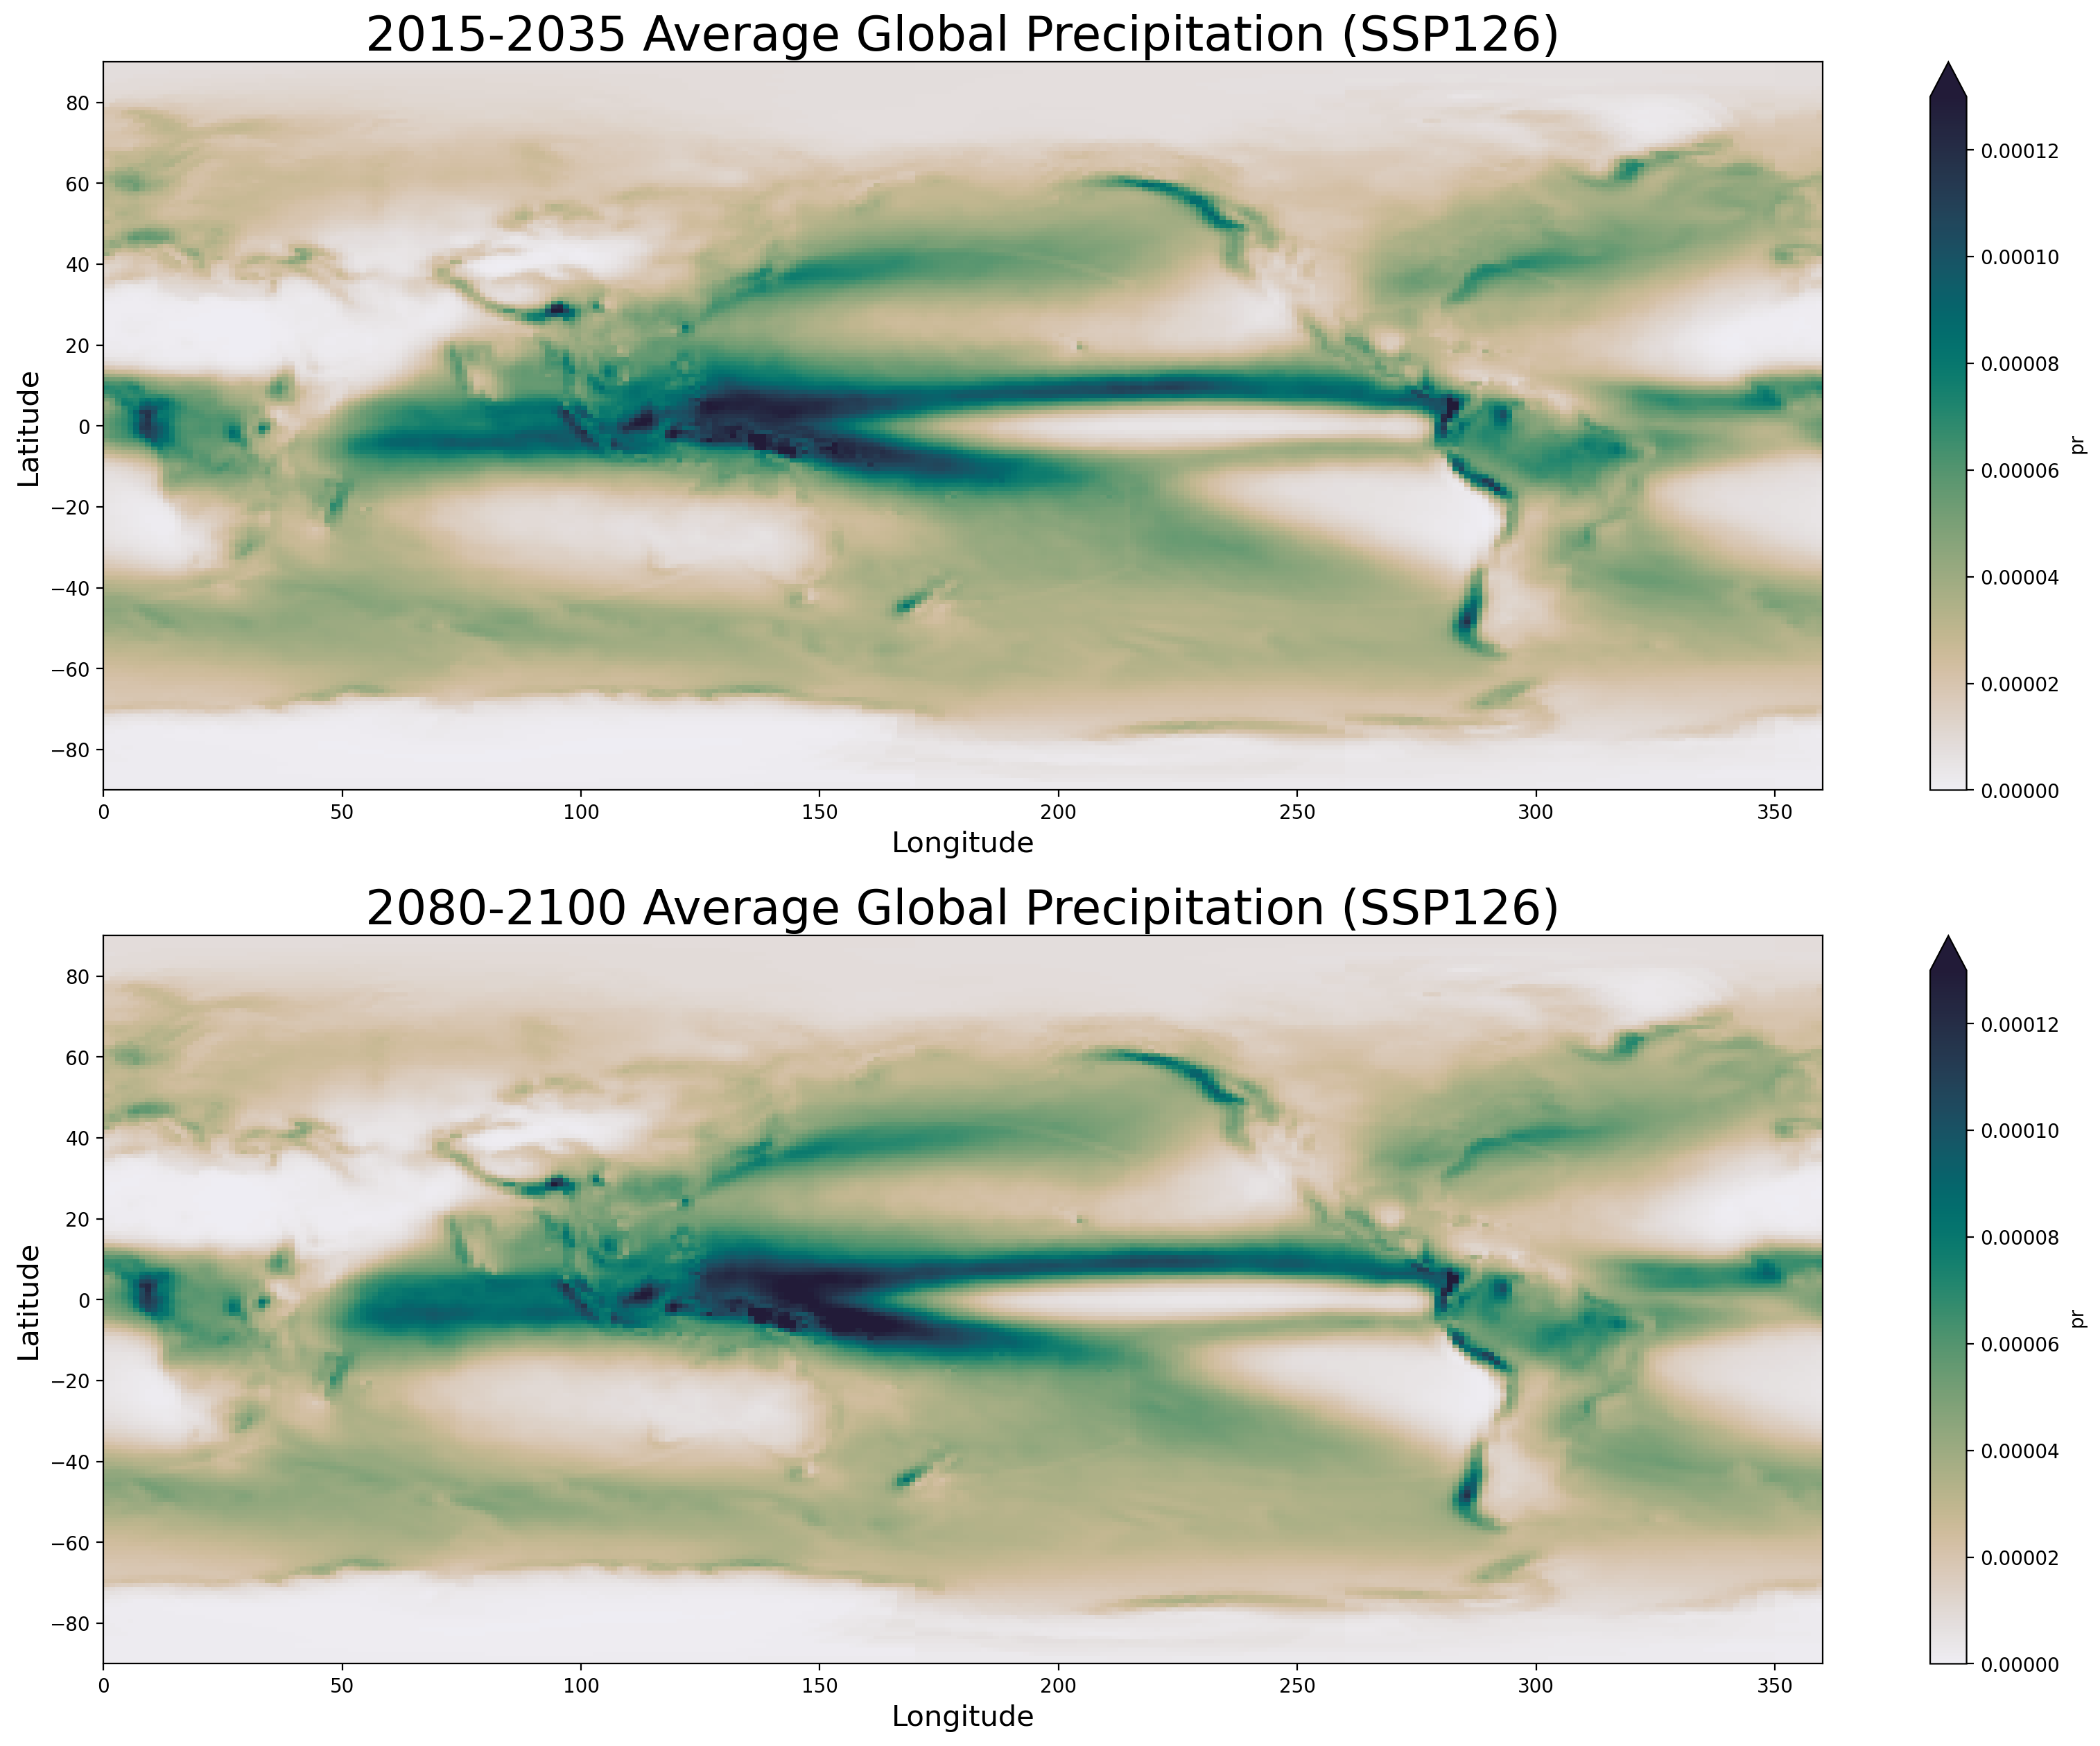

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15))

firstavg_pr126.plot(ax = ax1, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013)
lastavg_pr126.plot(ax = ax2, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013)

ax1.set_title('2015-2035 Average Global Precipitation (SSP126)', fontsize = 25)
ax2.set_title('2080-2100 Average Global Precipitation (SSP126)', fontsize = 25)

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

Text(0.5, 0, 'Longitude')

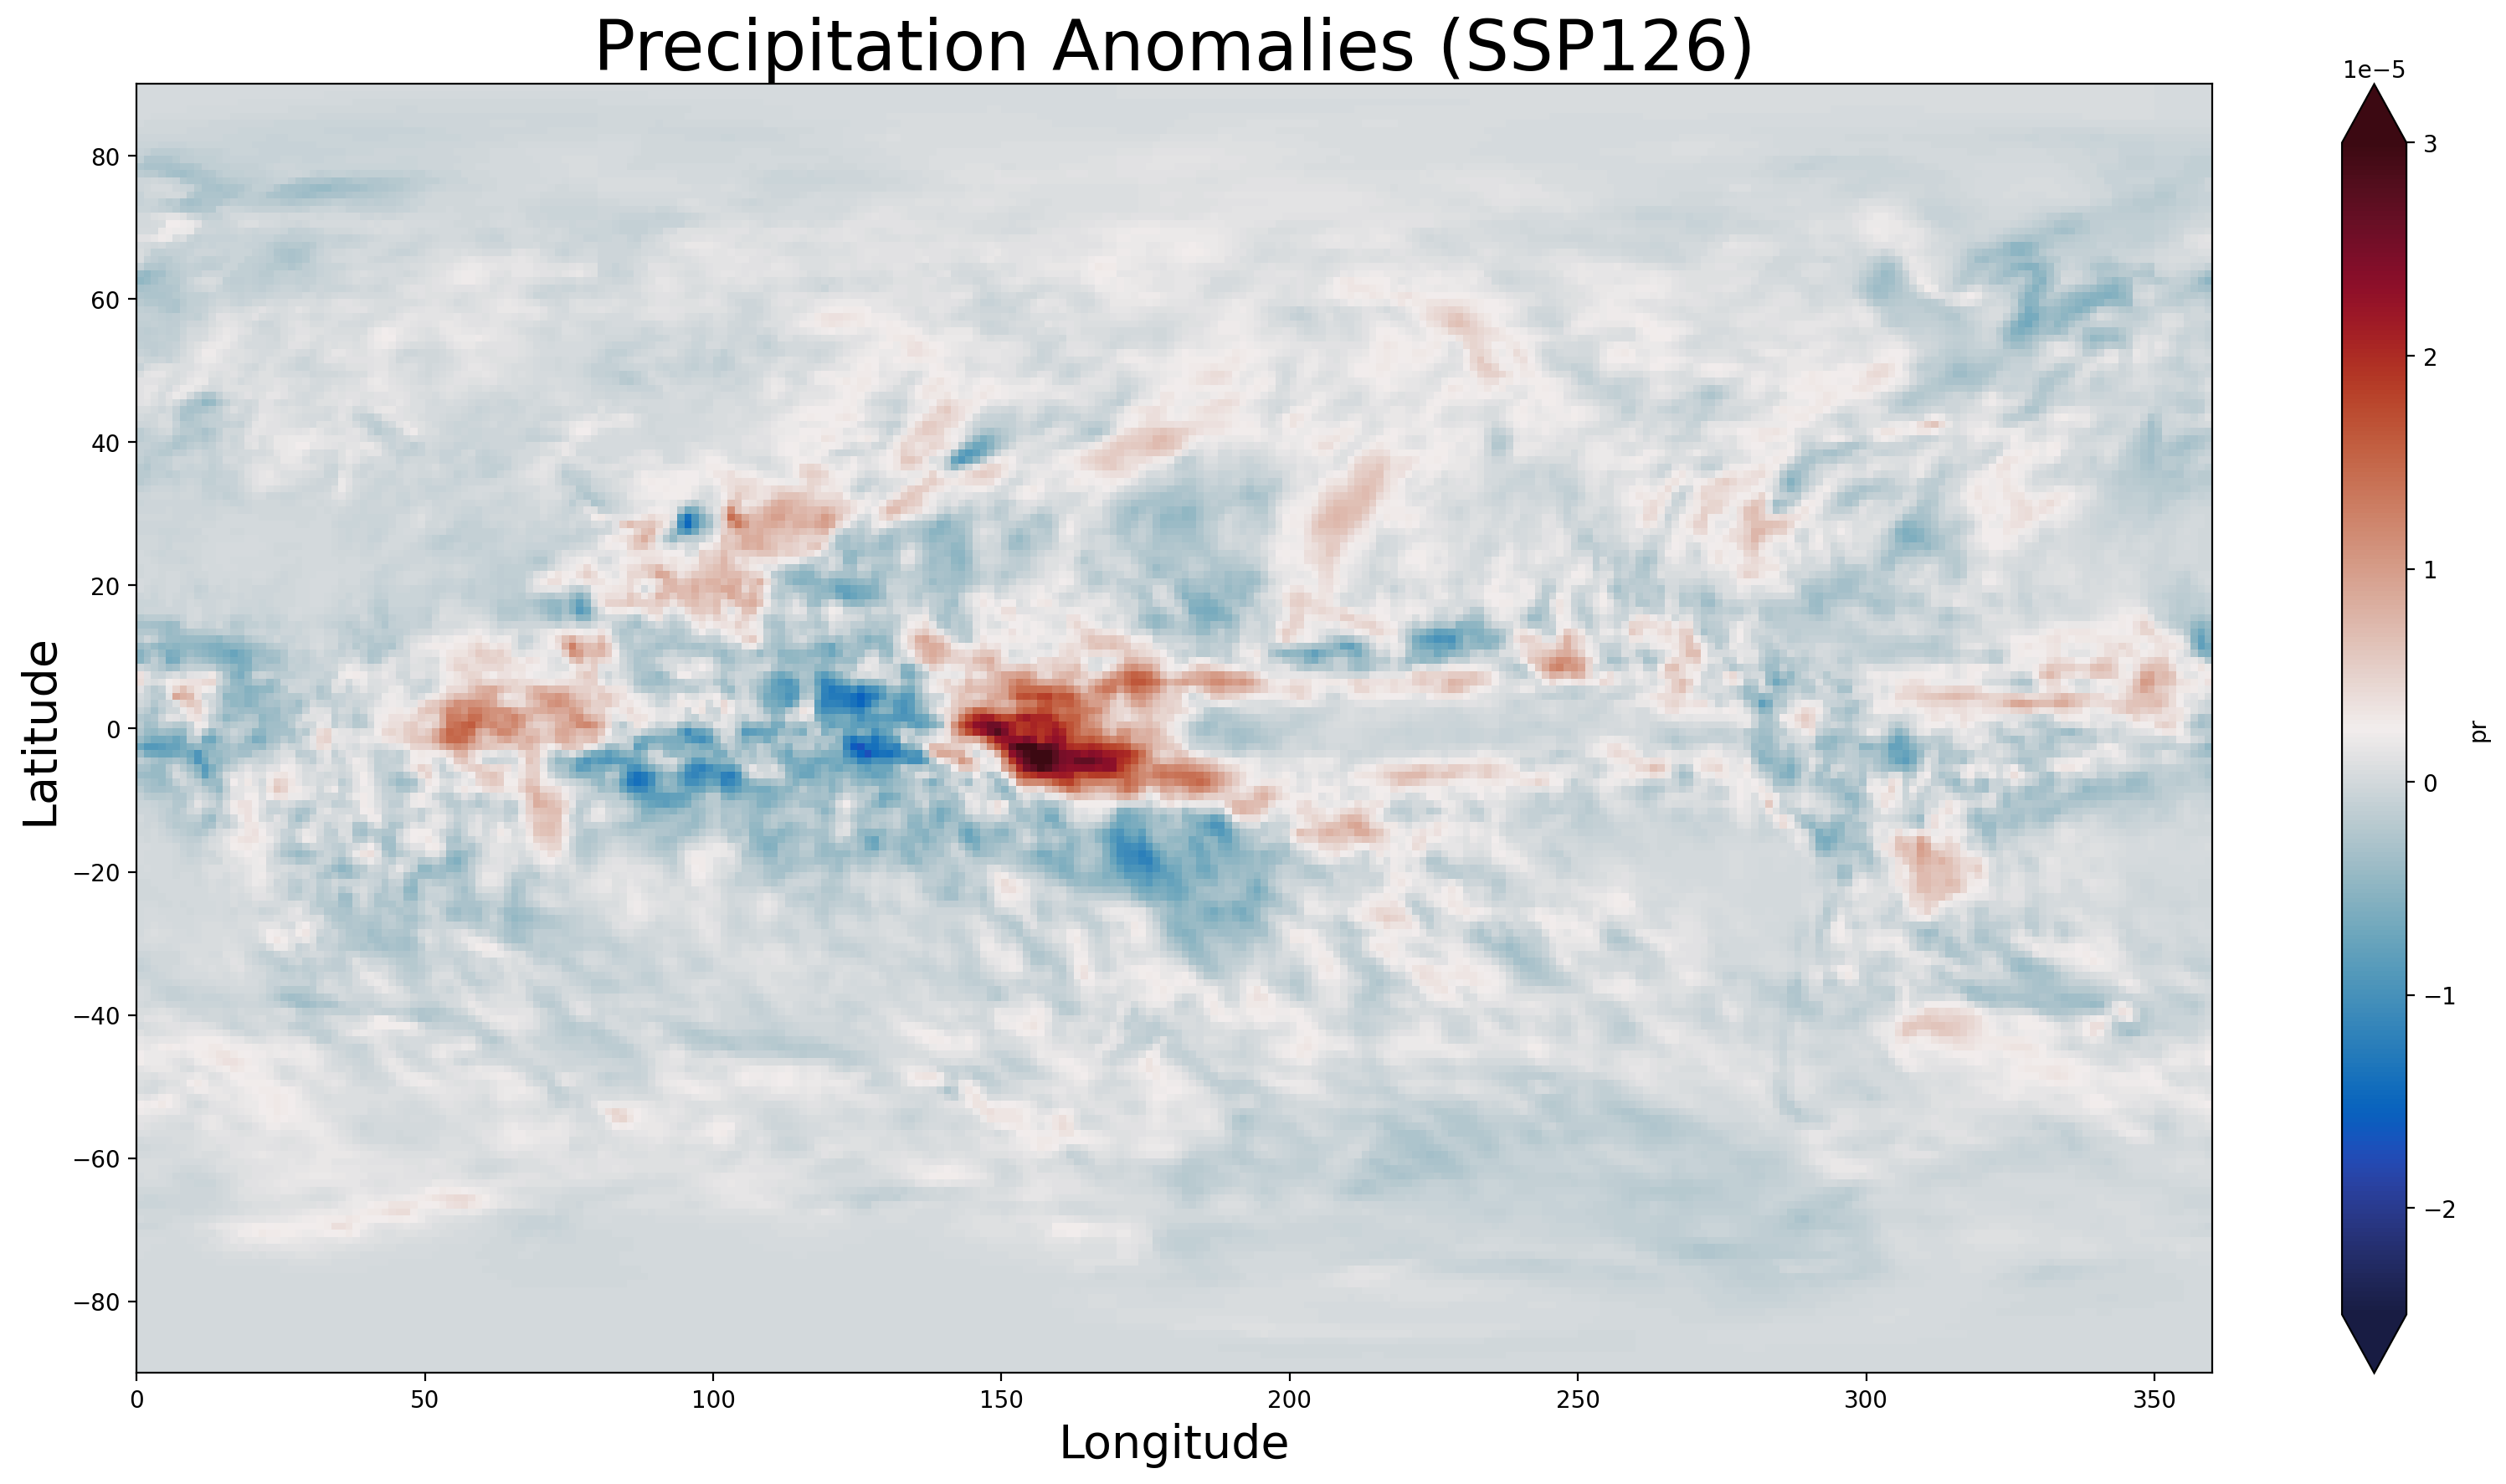

In [109]:
fig, ax = plt.subplots(figsize = (20, 10))

pr126_anomaly.plot(cmap = cmocean.cm.balance, extend = 'both', vmin = -0.000025, vmax = 0.00003)

ax.set_title('Precipitation Anomalies (SSP126)', fontsize = 30)

ax.set_ylabel('Latitude', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 20)

**pr585 Graphs**

In [116]:
first20yr_pr585 = pr585.sel(time = slice('2015-01-16', '2035-01-16'))
firstavg_pr585 = first20yr_pr585.mean('time')

last20yr_pr585 = pr585.sel(time = slice('2080-12-16', '2100-12-16'))
lastavg_pr585 = last20yr_pr585.mean('time')

pr585_anomaly = lastavg_pr585 - firstavg_pr585

Text(0.5, 0, 'Longitude')

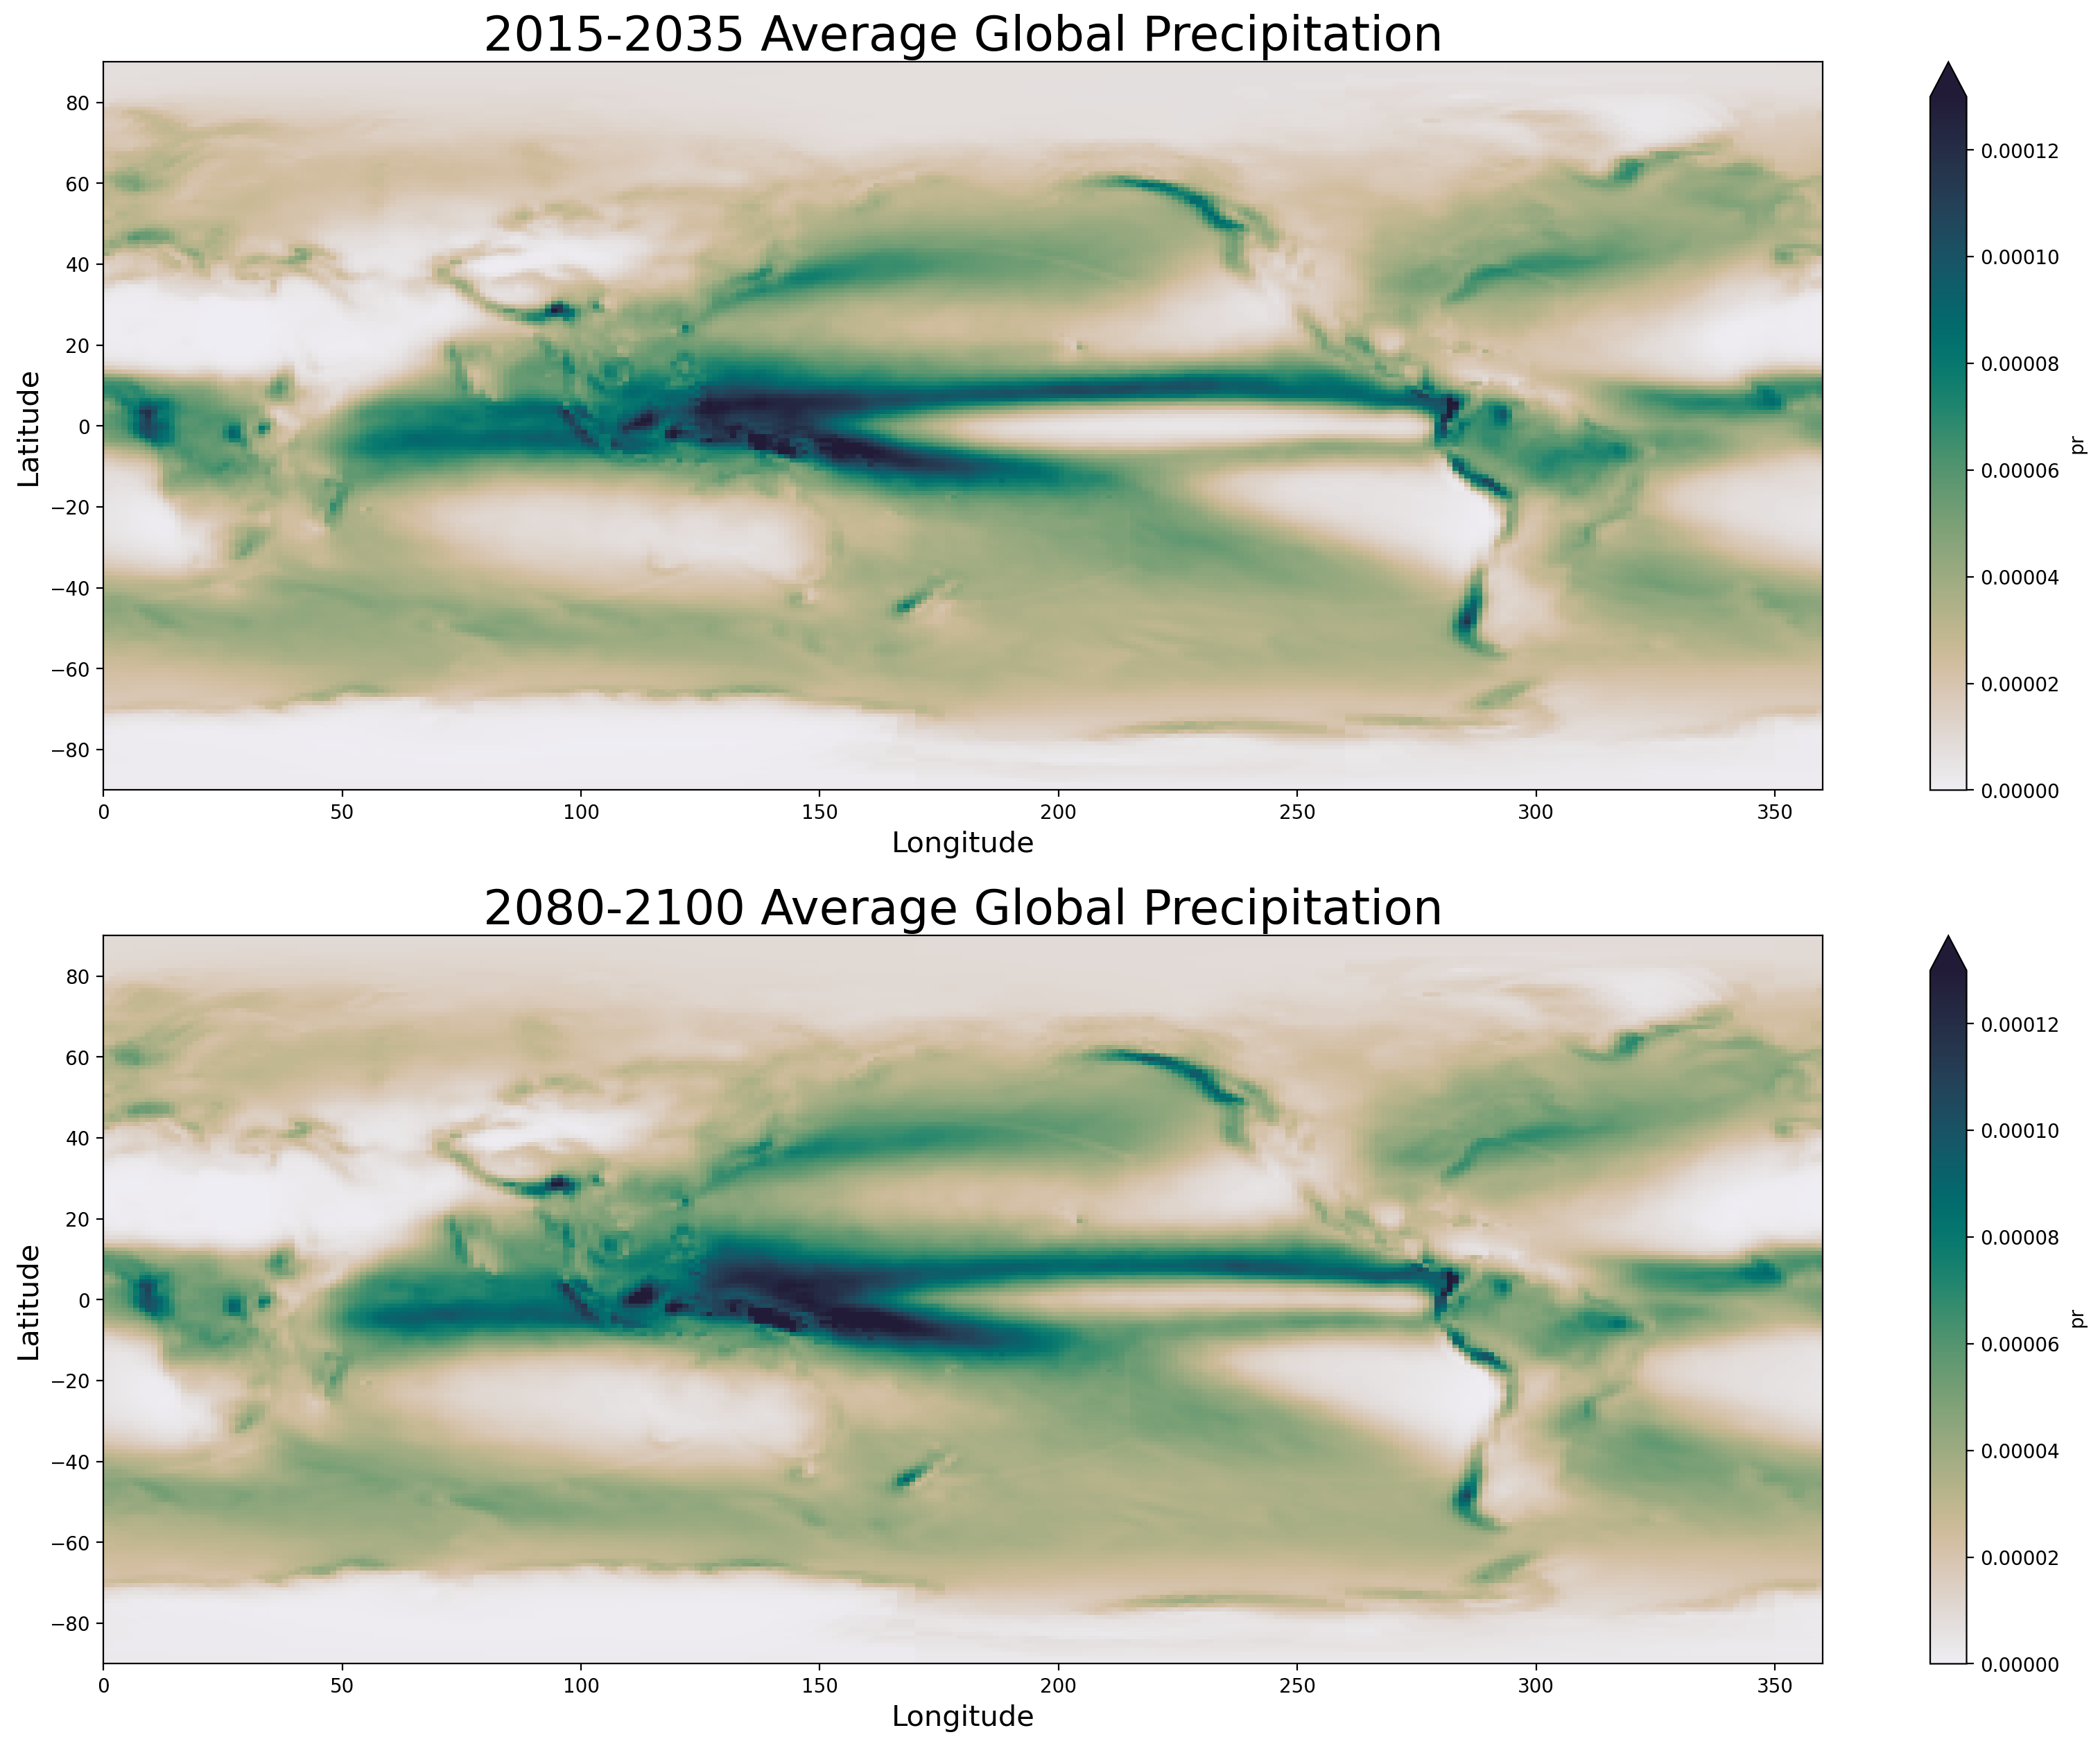

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15))

firstavg_pr585.plot(ax = ax1, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013)
lastavg_pr585.plot(ax = ax2, cmap = cmocean.cm.rain, vmin = 0, vmax = 0.00013)

ax1.set_title('2015-2035 Average Global Precipitation', fontsize = 25)
ax2.set_title('2080-2100 Average Global Precipitation', fontsize = 25)

ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

Text(0.5, 0, 'Longitude')

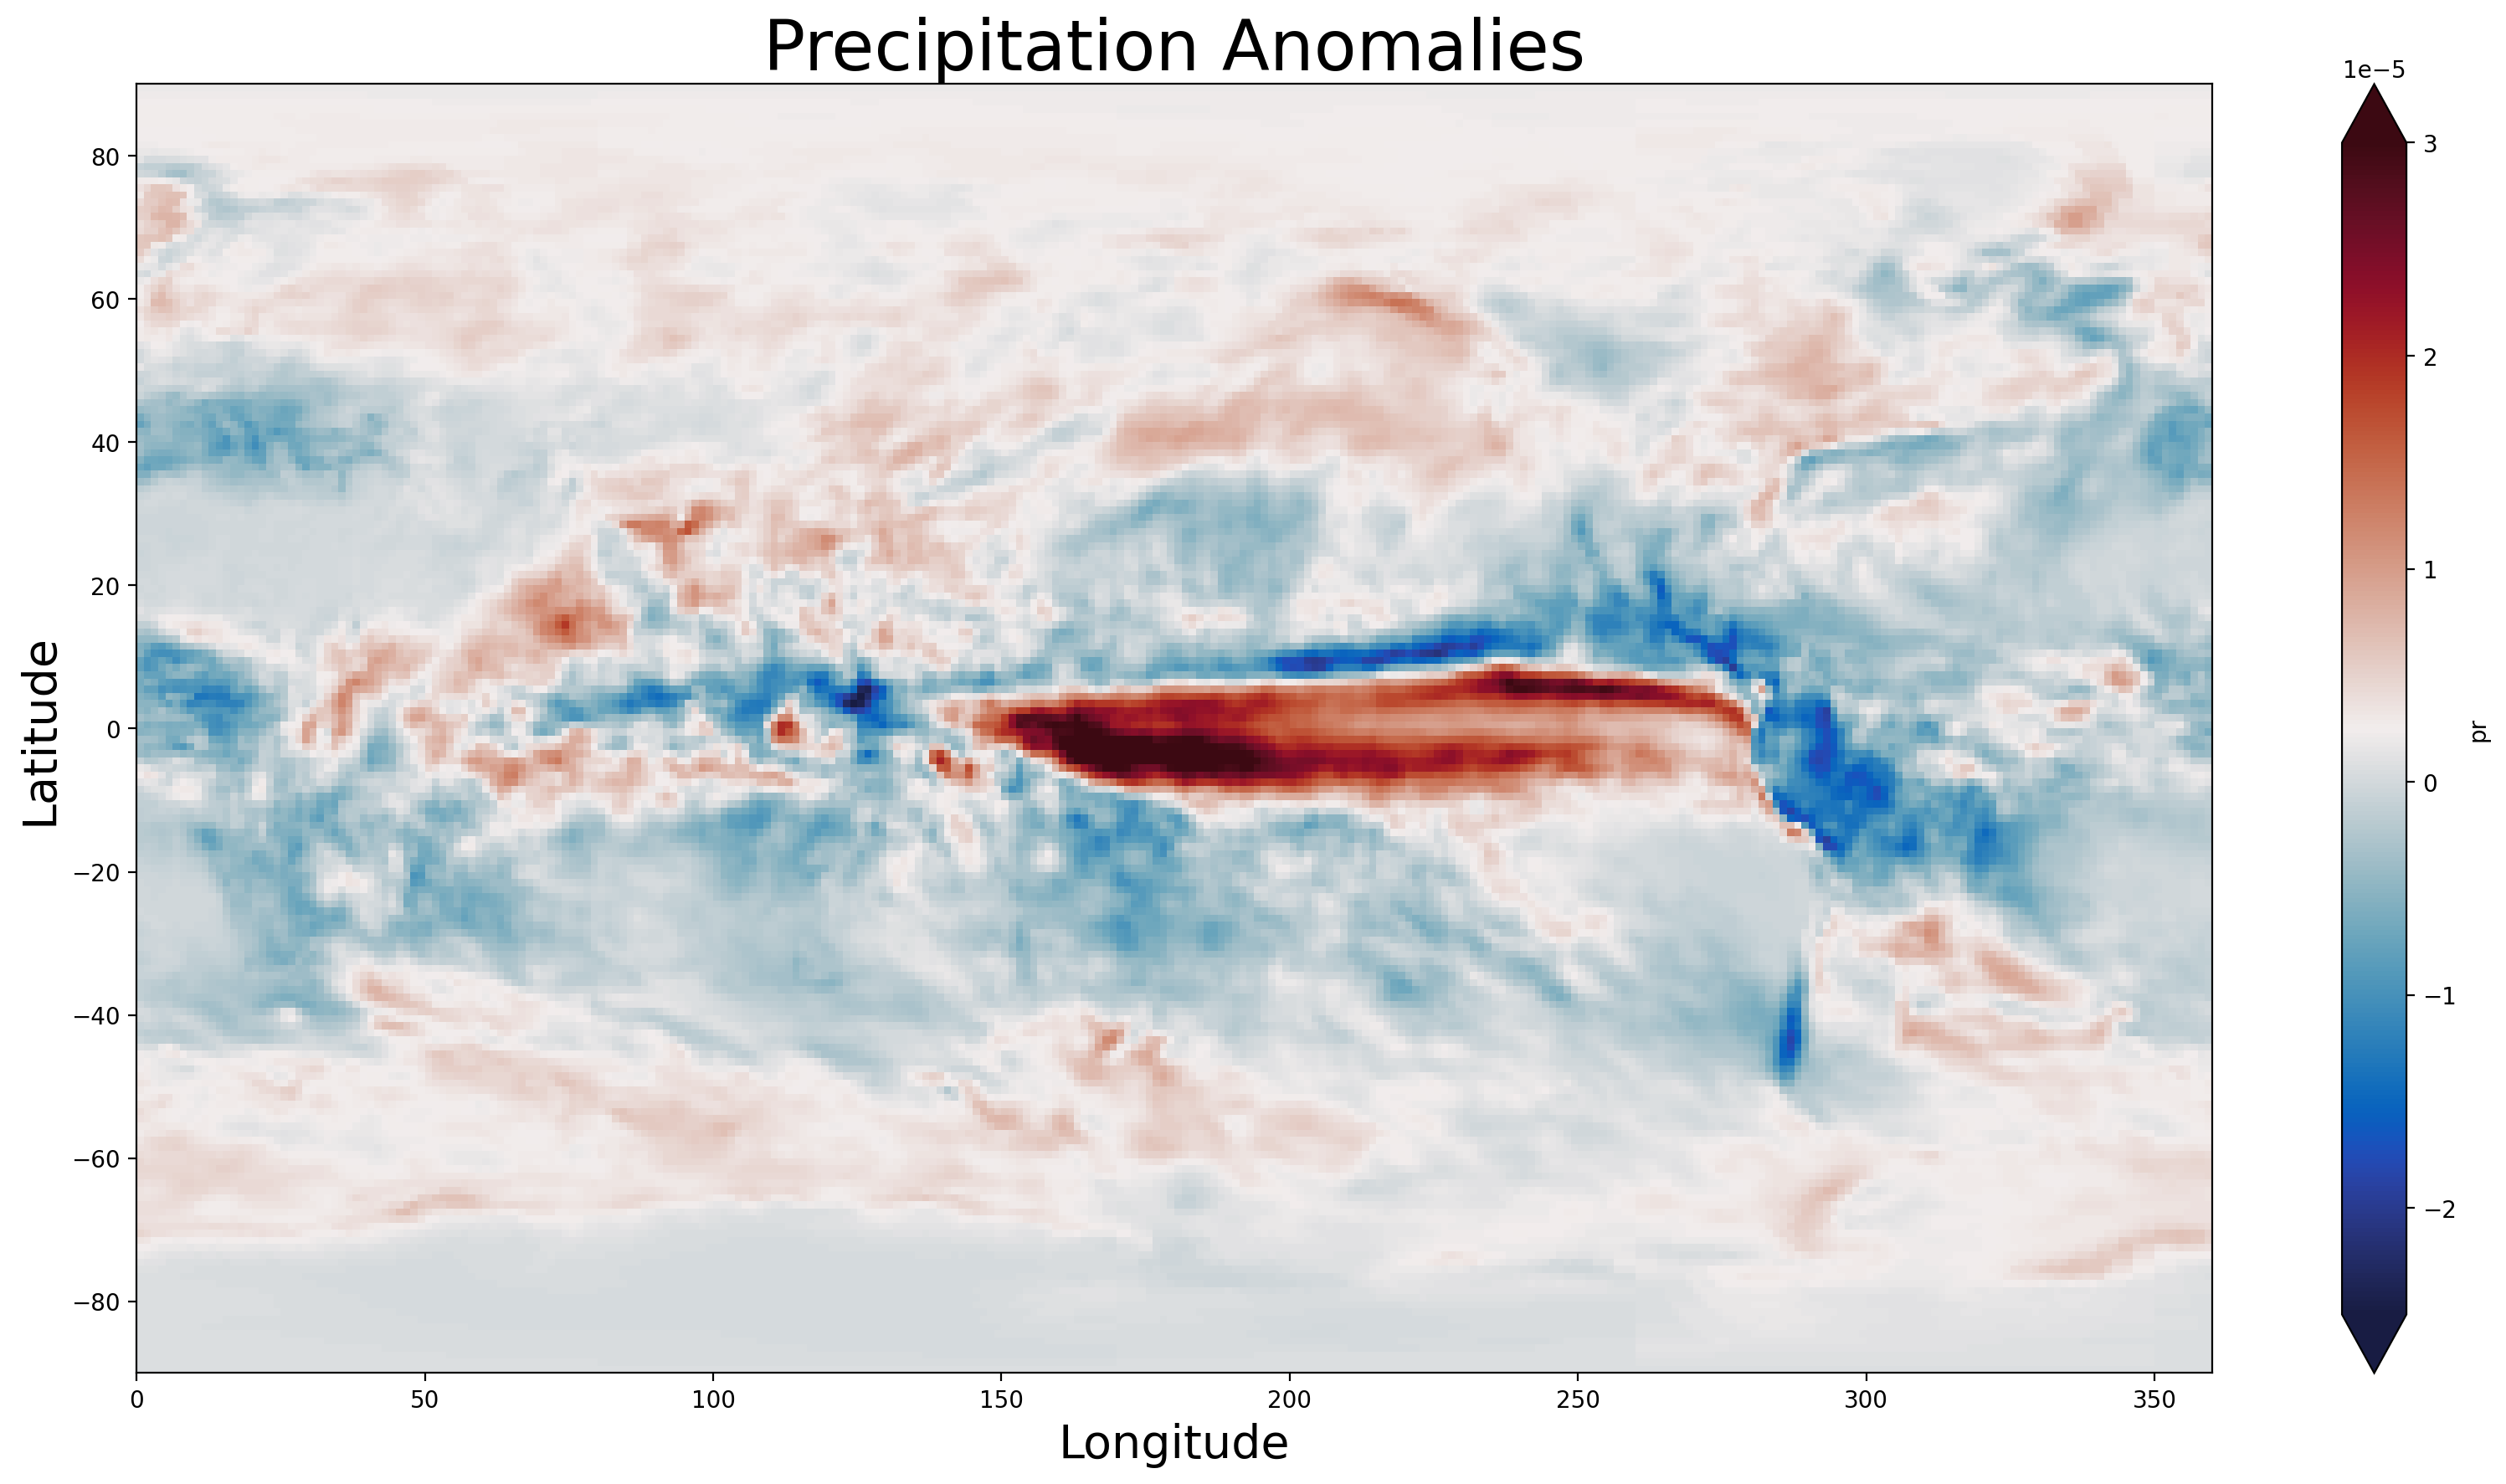

In [118]:
fig, ax = plt.subplots(figsize = (20, 10))

pr585_anomaly.plot(cmap = cmocean.cm.balance, extend = 'both', vmin = -0.000025, vmax = 0.00003)

ax.set_title('Precipitation Anomalies', fontsize = 30)

ax.set_ylabel('Latitude', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 20)